In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import plotly
import plotly.express as px

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [3]:
district_wise=pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [4]:
district_wise

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


#### DROPPING SOME COLUMNS WHICH ARE NOT REQUIRED FOR OUR CLUSTERING ANALYSIS!!

In [6]:
district_wise=district_wise[['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'RAPE',
 'KIDNAPPING & ABDUCTION',
 'DACOITY',
 'ROBBERY',
 'BURGLARY',
 'RIOTS',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS HURT']]

In [7]:
for i in range(len(district_wise['STATE/UT'])):
    if(district_wise['STATE/UT'][i]=='DELHI UT'):
        district_wise['STATE/UT'][i]='DELHI'
        

In [8]:
district_wise['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [9]:
district_wise=district_wise[district_wise['DISTRICT']!='TOTAL']

In [10]:
districtwise_sc=pd.read_csv("02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")

In [11]:
districtwise_sc['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [12]:
districtwise_sc['TOTAL CRIMES AGAINST SC']=districtwise_sc.iloc[:,3:].sum(axis=1)

In [13]:
districtwise_sctot=districtwise_sc[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST SC']]

In [14]:
districtwise_sctot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9014,LAKSHADWEEP,TOTAL,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,1
9016,PUDUCHERRY,PUDUCHERRY,2012,23


In [15]:
districtwise_sctot=districtwise_sctot[districtwise_sctot['DISTRICT']!='TOTAL']

In [16]:
districtwise_st=pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")

In [17]:
districtwise_st['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [18]:
districtwise_st=districtwise_st[districtwise_st['DISTRICT']!='TOTAL']

In [19]:
districtwise_st['TOTAL CRIMES AGAINST ST']=districtwise_st.iloc[:,3:].sum(axis=1)

In [20]:
districtwise_sttot=districtwise_st[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST ST']]

In [21]:
districtwise_sttot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,0


In [22]:
districtwise_child=pd.read_csv("03_District_wise_crimes_committed_against_children_2001_2012.csv")

In [23]:
districtwise_child['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [24]:
districtwise_child=districtwise_child[districtwise_child['DISTRICT']!='TOTAL']

In [25]:
districtwise_child.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"},inplace=True)

In [26]:
districtwise_child.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes',
       'TOTAL CRIMES AGAINST CHILDREN'],
      dtype='object')

In [27]:
districtwise_childtot=districtwise_child[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST CHILDREN']]

In [28]:
districtwise_childtot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9007,DELHI,STF,2012,0
9008,DELHI,WEST,2012,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7


In [29]:
districtwise_women=pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")

In [30]:
districtwise_women['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [31]:
districtwise_women=districtwise_women[districtwise_women['DISTRICT']!='TOTAL']

In [32]:
districtwise_women['TOTAL CRIMES AGAINST WOMEN']=districtwise_women.iloc[:,3:].sum(axis=1)

In [33]:
districtwise_womentot=districtwise_women[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST WOMEN']]

In [34]:
districtwise_womentot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,739
9012,LAKSHADWEEP,LAKSHADWEEP,2012,2
9014,PUDUCHERRY,KARAIKAL,2012,11


#### MERGING THE ABOVE DATASETS!!

In [37]:
cluster=pd.merge(district_wise,districtwise_sctot,how='inner',left_on=['STATE/UT','DISTRICT','YEAR'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_sttot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_childtot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_womentot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year'])


#### GROUPING BY STATE/UT,DISTRICT AND SUMMING ALL THE CRIMES OVER THE YEARS!!

In [38]:
cluster=cluster.groupby(['STATE/UT','DISTRICT']).sum().reset_index().drop(['Year'],axis=1)

In [39]:
cluster

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,2007,15,3,12,5,9,90,17,1,11,99,0,1,10,54
1,A & N ISLANDS,ANDAMAN,20059,118,92,73,4,63,708,115,9,80,910,0,33,206,458
2,A & N ISLANDS,CAR,2012,2,0,1,1,0,0,0,0,0,4,0,0,2,2
3,A & N ISLANDS,NICOBAR,20059,12,2,1,1,0,23,0,0,3,34,0,3,1,11
4,A & N ISLANDS,NORTH,2012,5,4,0,0,1,6,0,0,0,8,0,0,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,WEST BENGAL,PURULIA,24078,733,497,276,63,278,49,920,1,24,205,8,9,8,3180
820,WEST BENGAL,SEALDAH G.R.P.,24078,188,19,67,18,115,0,128,9,0,247,0,0,2,134
821,WEST BENGAL,SILIGURI G.R.P.,24078,42,2,31,13,15,1,26,3,0,0,0,1,7,61
822,WEST BENGAL,SILIGURI_PC,2012,32,21,123,3,29,3,9,0,3,812,0,8,44,552


### PHASE 4--CLUSTERING
## 4.1 CLUSTERING USING THE KMEANS!!

In [40]:
x=cluster.iloc[:,2:]

In [41]:
from sklearn.cluster import KMeans

In [42]:
kmeans=KMeans(n_clusters=3,random_state=0)

In [43]:
y_kmeans=kmeans.fit_predict(x)

### 4.2 Create DataFrame for each cluster that shows data according to the areas.
### REGION 1) Peaceful Areas

In [44]:
peaceful_regions=cluster[y_kmeans==0]

In [45]:
peaceful_regions

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
6,ANDHRA PRADESH,ADILABAD,24078,1186,672,754,72,237,2519,1016,33,395,16392,686,269,269,8583
7,ANDHRA PRADESH,ANANTAPUR,24078,1922,266,839,137,244,2536,1293,114,444,17682,1569,371,402,5287
8,ANDHRA PRADESH,CHITTOOR,24078,1270,368,907,96,207,2777,973,171,419,13543,1393,14,345,8004
9,ANDHRA PRADESH,CUDDAPAH,24078,1196,298,653,39,106,1549,1326,48,337,14301,1537,128,574,5002
10,ANDHRA PRADESH,CYBERABAD,20075,1810,641,1398,141,765,11946,559,88,491,32697,1657,341,296,15411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,WEST BENGAL,24 PARGANAS NORTH,24078,2329,1883,3311,248,739,387,5484,129,140,1879,22,21,1435,24376
795,WEST BENGAL,24 PARGANAS SOUTH,24078,2114,2221,2209,194,392,556,8893,41,129,1864,7,0,238,25115
812,WEST BENGAL,KOLKATA,24078,596,433,1534,151,1007,1434,2993,480,0,19434,17,1,1730,9797
815,WEST BENGAL,MURSHIDABAD,24078,1644,3352,2943,152,391,114,3143,281,248,18652,13,13,923,27004


### REGION 2) MODERATE Areas

In [46]:
moderate_regions=cluster[y_kmeans==1]

In [47]:
moderate_regions

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,2007,15,3,12,5,9,90,17,1,11,99,0,1,10,54
2,A & N ISLANDS,CAR,2012,2,0,1,1,0,0,0,0,0,4,0,0,2,2
4,A & N ISLANDS,NORTH,2012,5,4,0,0,1,6,0,0,0,8,0,0,7,9
5,A & N ISLANDS,SOUTH,2012,8,8,7,4,1,65,8,1,4,50,0,4,19,36
14,ANDHRA PRADESH,GUNTUR URBAN,6033,150,69,100,6,62,416,23,14,33,2398,139,24,127,1955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,WEST BENGAL,BKP CP,2012,89,36,214,16,48,9,125,3,0,143,0,2,22,1336
807,WEST BENGAL,HOWRAH CITY,14038,201,110,392,34,176,76,406,19,31,690,2,1,91,2247
810,WEST BENGAL,JHARGRAM,2012,30,21,21,10,19,3,52,1,1,11,0,2,6,123
814,WEST BENGAL,MIDNAPUR,2001,120,84,74,16,59,39,363,1,23,63,0,0,0,741


REGION 3) SENSITIVE Areas

In [48]:
sensitive_regions=cluster[y_kmeans==2]

In [49]:
sensitive_regions

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
1,A & N ISLANDS,ANDAMAN,20059,118,92,73,4,63,708,115,9,80,910,0,33,206,458
3,A & N ISLANDS,NICOBAR,20059,12,2,1,1,0,23,0,0,3,34,0,3,1,11
12,ANDHRA PRADESH,GUNTAKAL RLY.,24078,75,3,10,15,31,0,4,66,2,75,7,0,7,57
28,ANDHRA PRADESH,SECUNDERABAD RLY.,24078,104,7,9,8,54,6,16,169,2,138,9,2,1,53
33,ANDHRA PRADESH,VIJAYAWADA RLY.,24078,32,4,9,7,34,2,14,99,1,146,12,1,9,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,WEST BENGAL,PURAB MIDNAPUR,22077,707,555,1042,92,184,156,4082,18,68,113,34,6,89,7020
819,WEST BENGAL,PURULIA,24078,733,497,276,63,278,49,920,1,24,205,8,9,8,3180
820,WEST BENGAL,SEALDAH G.R.P.,24078,188,19,67,18,115,0,128,9,0,247,0,0,2,134
821,WEST BENGAL,SILIGURI G.R.P.,24078,42,2,31,13,15,1,26,3,0,0,0,1,7,61


### 4.3.3 "Analyse your clusters and prepare a report that explains all your observations
#### 10 MOST SAFE AREAS!!

In [50]:
peaceful_regions['OVERALL CRIME']=peaceful_regions.iloc[:,2:].sum(axis=1)

In [51]:
peaceful_regions.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)

In [52]:
peaceful_regions.head(10).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,ANDHRA PRADESH,VIJAYAWADA CITY,14063,254,200,485,10,226,1663,55,94,144,11687,1164,201,1001,8161,39408
1,TAMIL NADU,NAMAKKAL,24078,420,115,417,40,175,690,753,39,148,10465,429,5,179,1469,39422
2,RAJASTHAN,RAJSAMAND,24078,208,125,585,6,134,1015,944,10,152,10436,421,177,73,3130,41494
3,KERALA,TRIVANDRUM COMMR.,20075,119,260,213,86,852,2409,4298,49,136,9030,187,6,335,3466,41521
4,KARNATAKA,CHICKMAGALUR,24078,398,159,178,61,203,1832,1747,27,76,9579,895,48,140,2120,41541
5,KERALA,KOZHIKODE RURAL,18072,102,326,135,32,186,1616,6351,4,562,9255,289,33,327,4270,41560
6,KARNATAKA,CHITRADURGA,24078,439,229,226,48,256,1454,3401,21,89,9739,755,206,70,2083,43094
7,KARNATAKA,BIDAR,24078,472,105,253,59,299,1802,1934,14,209,11718,510,26,227,1930,43636
8,TAMIL NADU,DHARMAPURI,24078,665,177,538,61,226,1022,2334,42,458,11529,437,7,283,1961,43818
9,GUJARAT,MEHSANA,24078,378,92,661,191,474,2565,1083,87,217,9223,893,28,283,3693,43946


### 10 MOST SENSITIVE AREAS

In [53]:
sensitive_regions['OVERALL CRIME']=sensitive_regions.iloc[:,2:].sum(axis=1)

In [54]:
sensitive_regions.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)

In [55]:
sensitive=sensitive_regions.reset_index().drop(['index'],axis=1).head(10)

In [56]:
sensitive

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,UTTAR PRADESH,LUCKNOW,24078,1828,689,2914,186,1532,6663,2909,274,67,793,2482,22,1251,12679,58367
1,UTTAR PRADESH,KANPUR NAGAR,24078,1961,492,2636,197,1199,2849,1945,225,99,5567,2654,16,1231,10904,56053
2,UTTAR PRADESH,AGRA,24078,1609,493,2541,201,1220,3063,3279,260,121,5381,1943,7,1456,9497,55149
3,ASSAM,GUWAHATI CITY,24078,698,682,2959,253,1582,6701,2037,154,218,6441,3,8,25,6031,51870
4,BIHAR,MUZAFFARPUR,24078,1779,788,2332,494,1121,2498,5098,39,404,6568,1136,10,568,4225,51138
5,CHHATTISGARH,DURG,24078,898,1402,490,46,703,6527,702,70,337,5234,462,417,2767,6574,50707
6,ASSAM,DHUBRI,24078,634,1363,1795,263,243,1286,5698,98,421,4885,16,2,562,8940,50284
7,WEST BENGAL,JALPAIGURI,24078,1345,1777,1853,132,477,507,791,60,121,5558,6,6,364,12073,49148
8,UTTAR PRADESH,ALIGARH,24078,2032,636,2134,176,1201,1875,2823,50,393,3756,1801,31,1000,7051,49037
9,UTTAR PRADESH,ALLAHABAD,24078,1652,430,1425,83,677,2861,1847,154,189,5073,2259,19,787,5769,47303


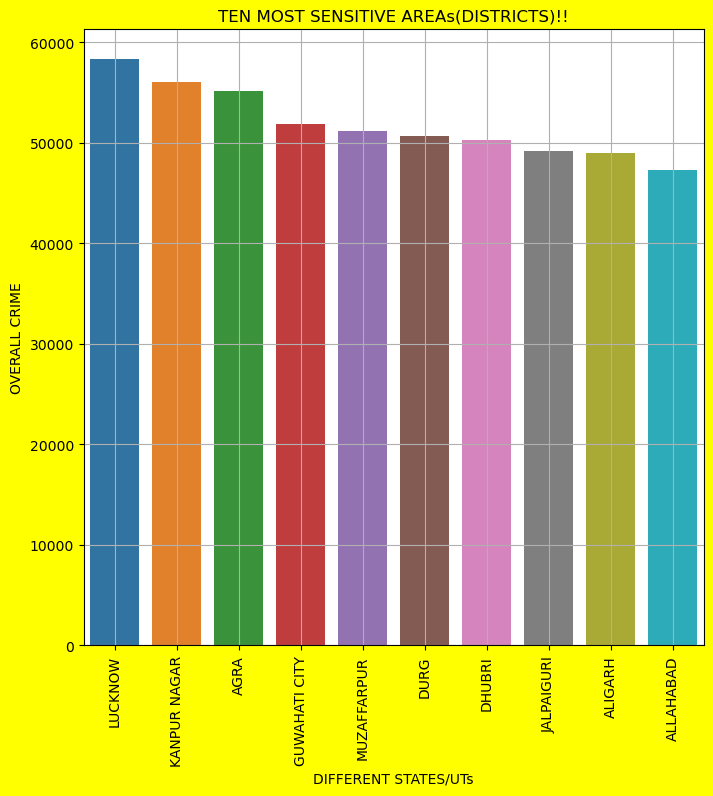

In [57]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=sensitive['DISTRICT'],y=sensitive['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("TEN MOST SENSITIVE AREAs(DISTRICTS)!!")
plt.grid()
plt.show()

### 4.3.1 What is impacting more crimes in sensitive areas?

In [58]:
sensitive_reg=sensitive_regions.reset_index().drop(['index'],axis=1).head(50)

<Figure size 2500x9000 with 0 Axes>

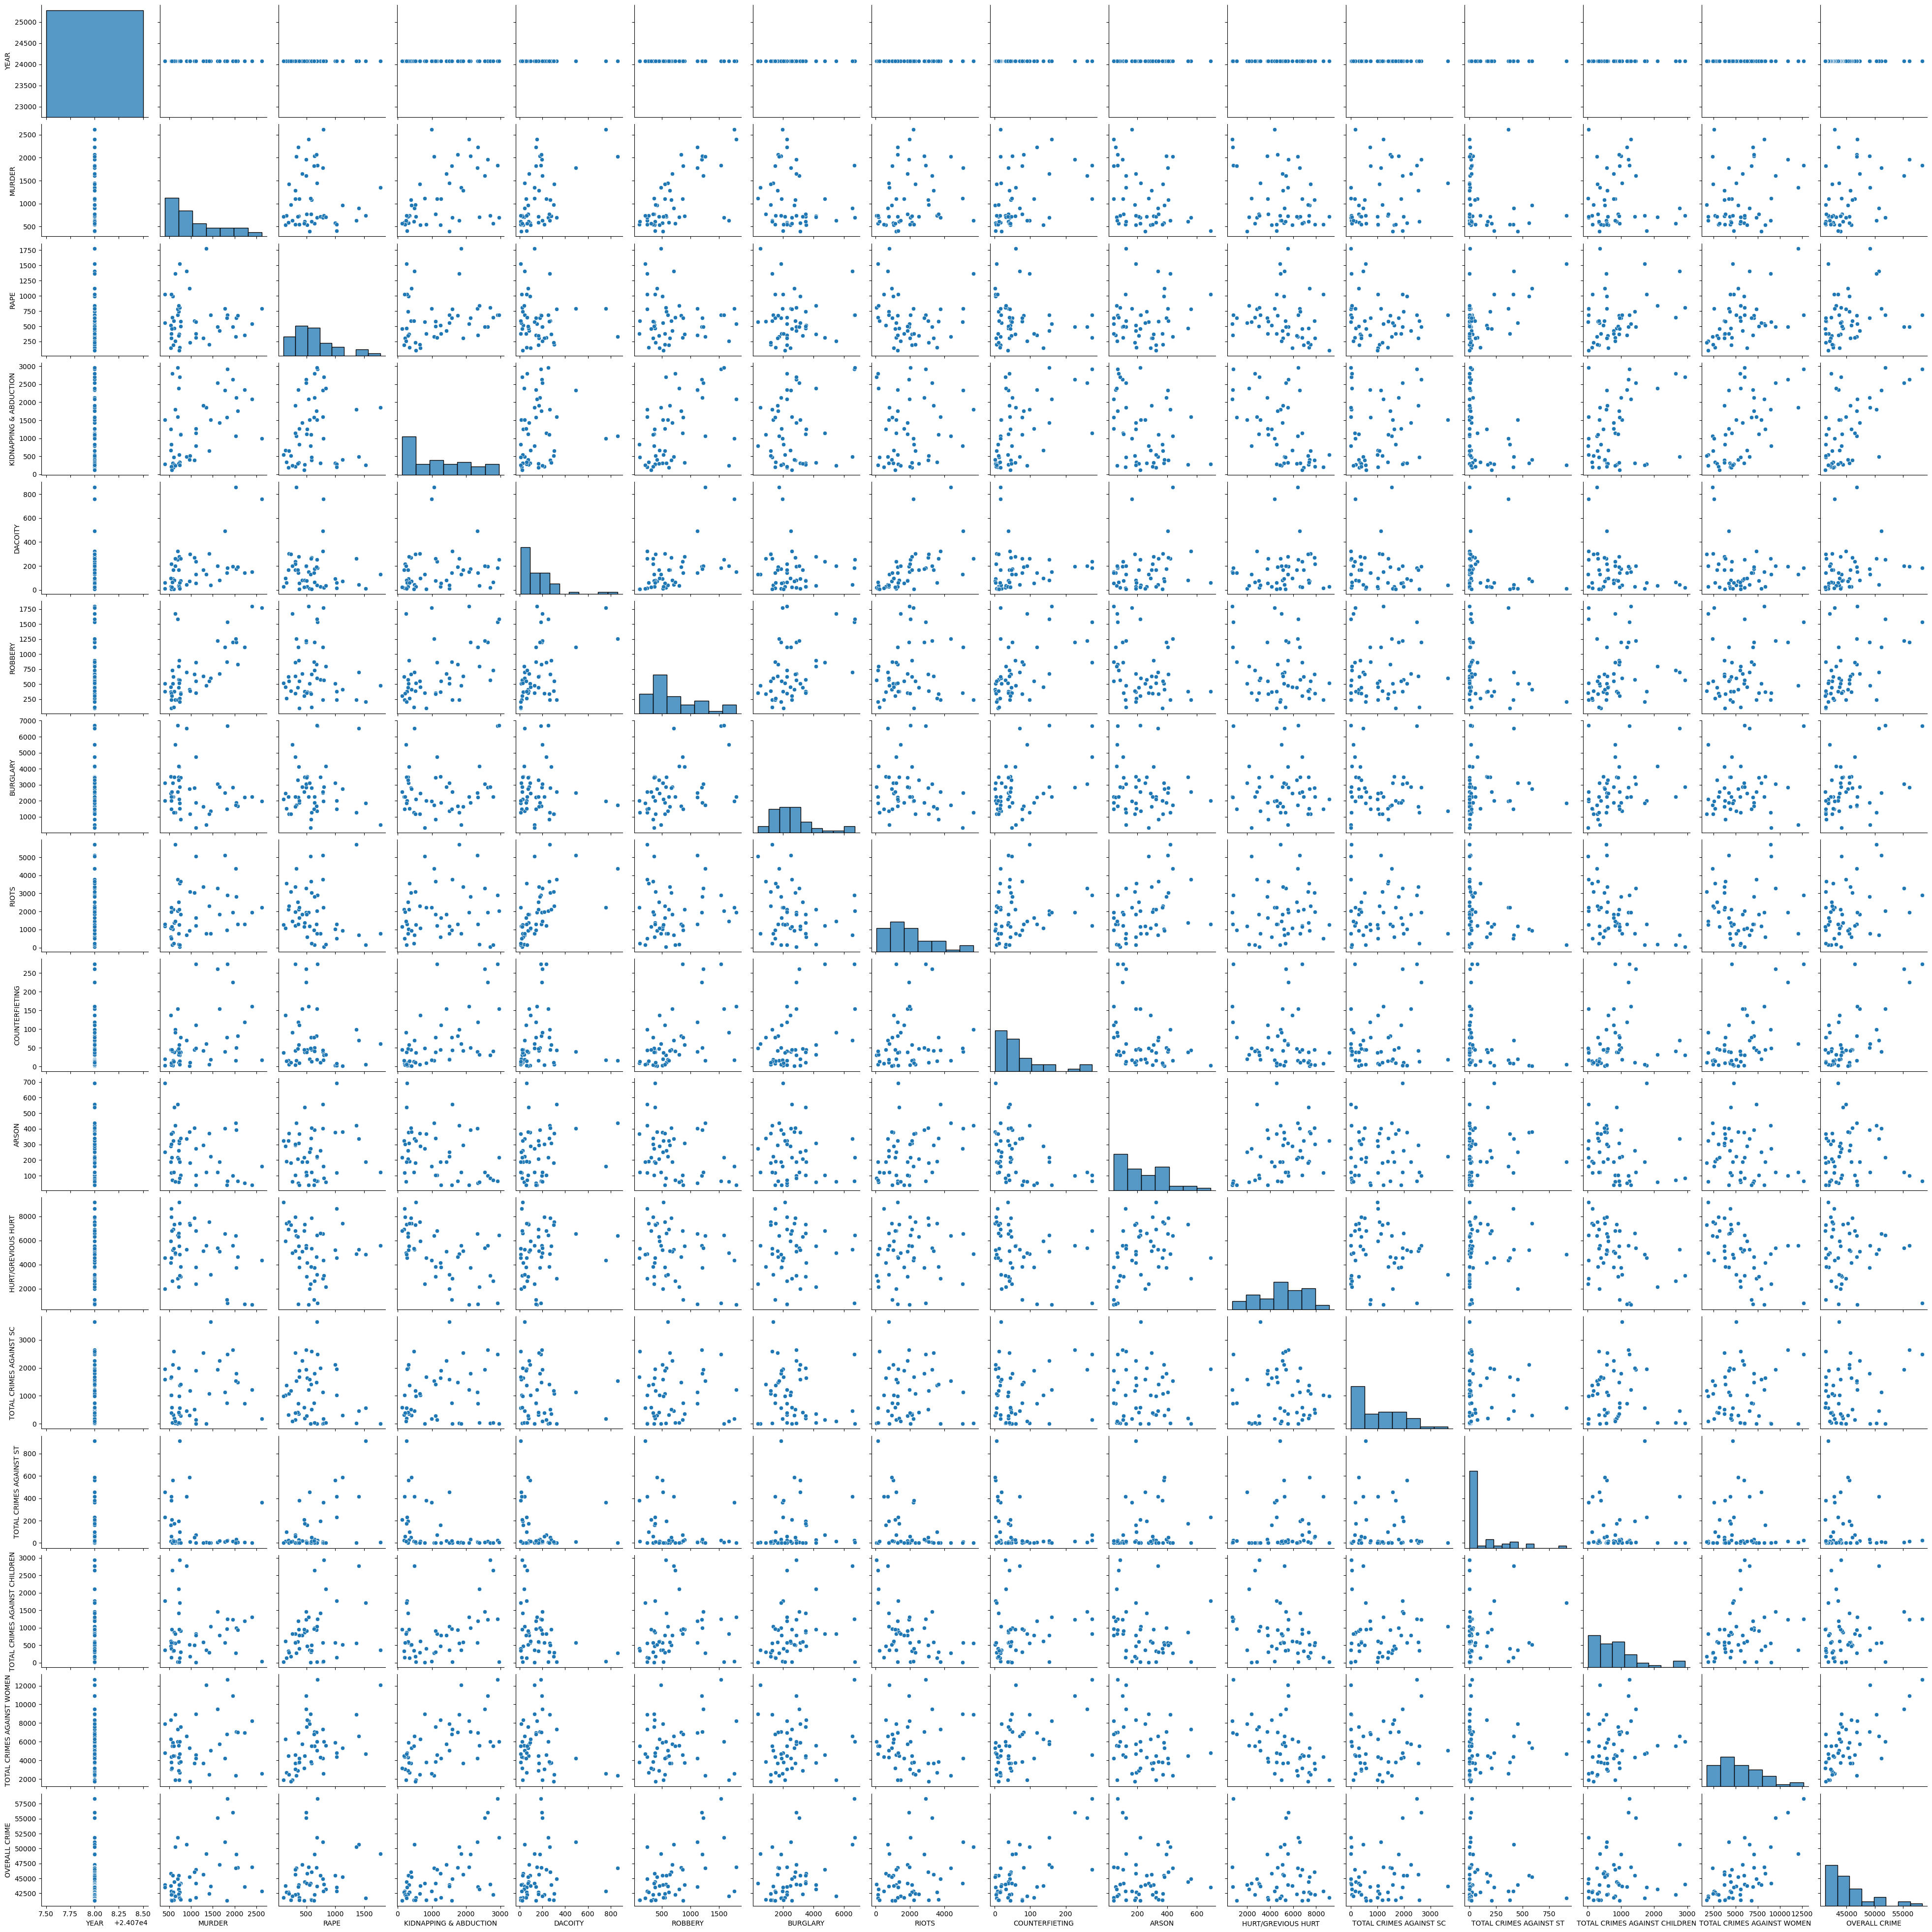

In [59]:
plt.figure(figsize=(25,90))
sns.pairplot(sensitive_reg)
plt.xticks(size=20)
plt.show()

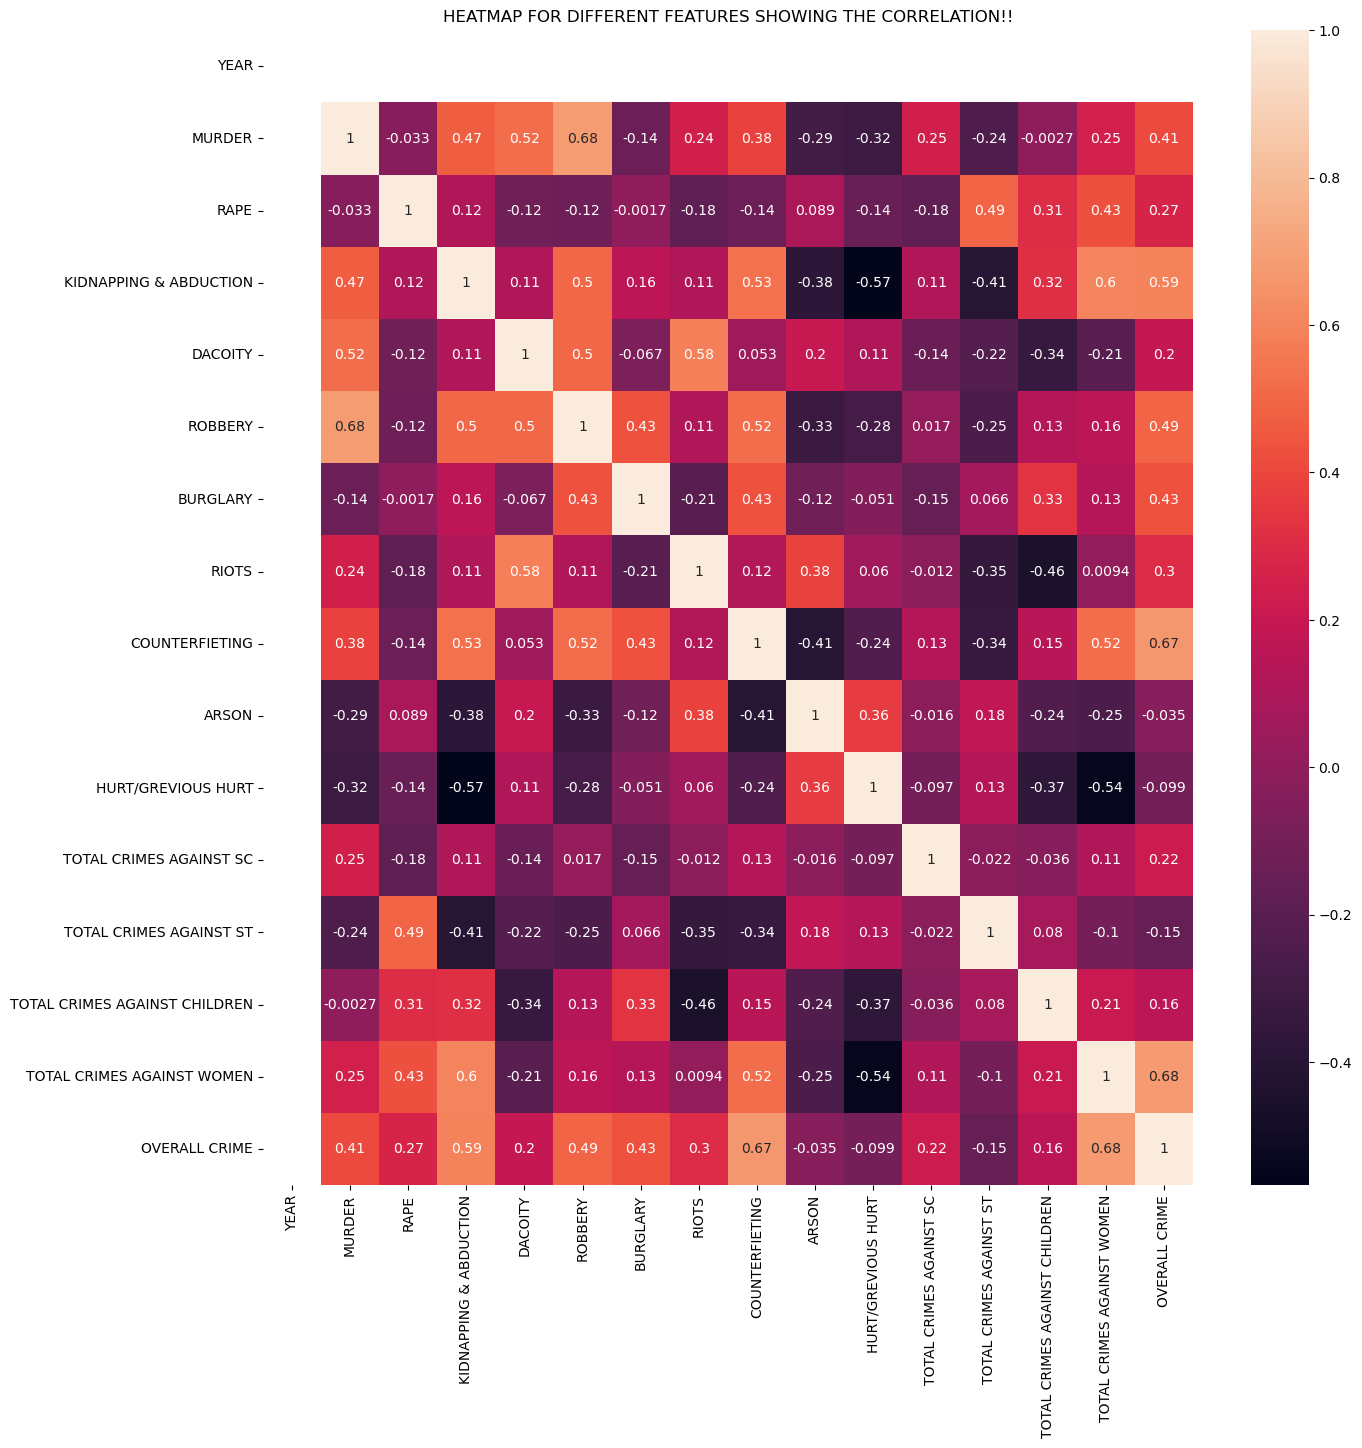

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(sensitive_reg.iloc[:,2:].corr(),annot=True)
plt.title("HEATMAP FOR DIFFERENT FEATURES SHOWING THE CORRELATION!!")
plt.show()

THE HEATMAP DESCRIBING THE CORRELATION FOR DIFFERENT FEATURES CAN BE SEEN FROM THE ABOVE PLOT!!

### 4.3.2 What needs to be done to reduce crime.

Addressing the issue of crime in India is a multifaceted challenge that demands a collaborative effort from diverse stakeholders, including the government, law enforcement agencies, civil society organizations, and the general public. To mitigate crime, the following measures can be implemented:

Enhance law enforcement: The government should allocate increased resources and funding to empower law enforcement agencies, enhancing their capabilities in crime prevention and investigation. Implementing police reforms is crucial to fostering accountability, efficiency, and effectiveness within the force.

Tackle socio-economic factors: Crime is often linked to socio-economic challenges such as poverty, unemployment, and limited education. The government should proactively address these issues by generating employment opportunities, enhancing educational access, and ensuring basic amenities like water, electricity, and healthcare.

Reinforce the justice system: Streamlining the justice system is imperative, considering its current sluggishness and inefficiency, which can lead to public frustration. Reforms should be enacted to make the justice system more responsive to the needs of the people.

Promote public awareness: Creating awareness about the consequences of crime and the significance of reporting incidents is crucial. Conducting awareness campaigns can educate the public about their rights and responsibilities.

Enhance community policing: Fostering community policing can establish trust between the police and the community, resulting in improved crime prevention and investigation. Collaboration between the police and the community is vital for identifying and addressing local issues effectively.

Embrace technology: Leveraging technology is pivotal in crime prevention and resolution. The government should invest in modernizing the police force by incorporating advanced technology such as CCTV cameras, drones, and digital forensics.

Reform the prison system: Overcrowded and inhumane prison conditions can contribute to further radicalization of inmates. The government must take measures to improve prison conditions and provide inmates with access to education and vocational training.

## 4.3.4  Crimes in India - Capstone project overall story in your own words. Min 1000 words.


India, with its vast population exceeding 1.38 billion, grapples with a noteworthy crime issue that impacts its citizens. According to data from the National Crime Records Bureau (NCRB) in 2011, there were 2.27 million reported cases of crime, reflecting a 4.54% decrease from the preceding year.

Crimes against women, encompassing rape, sexual harassment, and domestic violence, persist as a major concern in India. In 2011, there were 213,949 reported cases of crimes against women, with 11.04% of these cases linked to rape or sexual assault. Despite the implementation of stricter laws and heightened public awareness, crimes against women continue to pose a persistent challenge in India.

Crimes against children, including rape, kidnapping, abduction, murder, trafficking, and importation, remain alarming concerns. In 2011, there were 33,049 reported cases of crimes against children, with 21.51% related to rape or sexual assault, and a substantial 46.24% attributed to murder among various crimes against children. Despite legislative efforts and enhanced law enforcement, there has been a notable 254.86% increase from 2001 to 2011. Madhya Pradesh records the highest number of cases at 40,217 over the years, followed by Uttar Pradesh and Maharashtra with counts of 29,969 and 27,845, respectively. In 2011, 33,718 cases were registered against Scheduled Castes (SC).

Juvenile involvement poses a serious threat to society, with misguided and mishandled juveniles often veering towards criminal paths. Stricter laws should address this issue, with 23,597 cases recorded in 2001, increasing to 27,471 in 2011. Madhya Pradesh tops the list with 61,939 cases, while Manipur records the fewest cases.

Police involvement in human rights violations constitutes a significant share of total IPC crimes. The year 2009 saw the highest number of cases, with 664 recorded incidents. Notably, there is an 82.815% decrease in cases from 2001 to 2011. Chhattisgarh reports the highest number of human rights violation cases across states from 2001 to 2011.

It's crucial to acknowledge that those entrusted with maintaining law and order, i.e., the police department, also face assaults from riotous mobs, extremists, counter-insurgency operations, and more. Uttar Pradesh recorded 2,150 cases from 2001 to 2011, with Jammu & Kashmir ranking fourth with a total count of 1,142. A nearly 5% increase in cases is evident from 2001 to 2011. In Jammu & Kashmir, a decline in cases of assaults and killings of police/army personnel is observed, decreasing from 300 in 2001 to 50 in 2010, representing an 83.33% decrease.

When combining DACOITY/ROBBERY/BURGLARY/THEFT, Maharashtra, Uttar Pradesh, and Madhya Pradesh lead with counts of Maharashtra - 717,452, Madhya Pradesh - 389,927, and Uttar Pradesh - 366,166.

In summary, while there has been an increase in reported crimes in India, indicating persistent challenges, the government must persist in efforts to enhance law enforcement, raise public awareness, and address socio-economic factors.